<a href="https://colab.research.google.com/github/Neykone/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *


In [4]:
df=pd.read_csv('titanic.csv')
df=df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [6]:
agemean=df['Survived']
survi=agemean.mean()*100
survi

np.float64(67.21311475409836)

1-Quel sont les colonees avec des valeurs manquantes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


toutes lee colonnes ont des valeurs non-null

2-quel est l'age moyen des passagers

In [8]:
table=df[['PassengerId','Survived','Pclass','Age']]
table

,PassengerId,Survived,Pclass,Age
1,2,1,1,38.0
3,4,1,1,35.0
6,7,0,1,54.0
10,11,1,3,4.0
11,12,1,1,58.0
...,...,...,...,...
871,872,1,1,47.0
872,873,0,1,33.0
879,880,1,1,56.0
887,888,1,1,19.0


In [26]:
table.groupby(['Survived']).mean()

,PassengerId,Pclass,Age
Survived,,,
0,402.983333,1.216667,41.350000
1,480.918699,1.178862,32.905854


In [9]:
age=df['Age']
age

,Age
1,38.0
3,35.0
6,54.0
10,4.0
11,58.0
...,...
871,47.0
872,33.0
879,56.0
887,19.0


2-age moyen des passagers

In [10]:
agemoyen = np.mean(age)
agemoyen

np.float64(35.6744262295082)

3-quel est le passager le plus age et le moins age

In [11]:
plusage=np.max(age)
plusage



80.0

In [12]:
moinsage=np.min(age)
moinsage

0.92

In [13]:
df.columns
moreage=df[df['Age']==plusage]
moreage

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


L'analyse montre que le doyen du navire était âgé de 80 ans et qu'il a survécu au naufrage, ce qui est intéressant à noter pour un passager de cet âge

In [14]:
lessage=df[df['Age']==moinsage]
lessage

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S


-les enfants qui etaient dans le titanic

In [15]:
enfant=table[table["Age"]<18]
enfant

,PassengerId,Survived,Pclass,Age
10,11,1,3,4.00
183,184,1,2,1.00
193,194,1,2,3.00
205,206,0,3,2.00
297,298,0,1,2.00
305,306,1,1,0.92
307,308,1,1,17.00
329,330,1,1,16.00
340,341,1,2,2.00
435,436,1,1,14.00


3-quel est le pourcentage des enfants qui ont survecu

In [16]:
percent=np.average(enfant,axis=0)[1]*100
percent

np.float64(89.47368421052632)

89% des enfants ont survecue

<Axes: xlabel='Survived', ylabel='Age'>

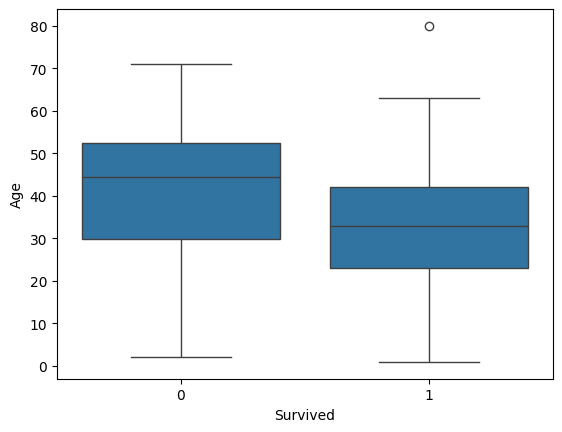

In [17]:
sns.boxplot(x='Survived',y='Age',data=df)

<Axes: xlabel='Survived', ylabel='Age'>

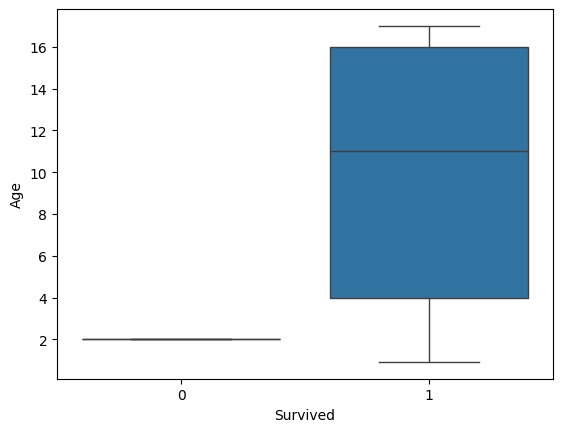

In [18]:
sns.boxplot(x='Survived',y='Age',data=enfant)

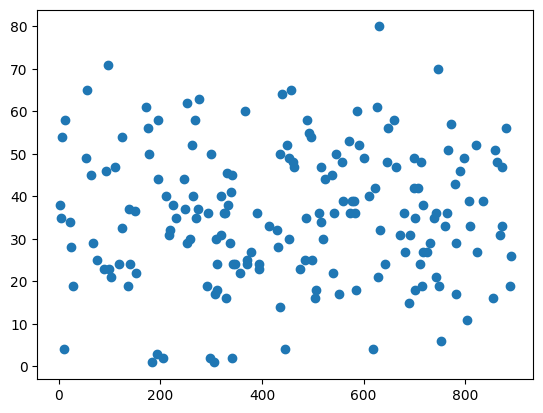

In [29]:
plt.scatter(df['PassengerId'],df['Age'])

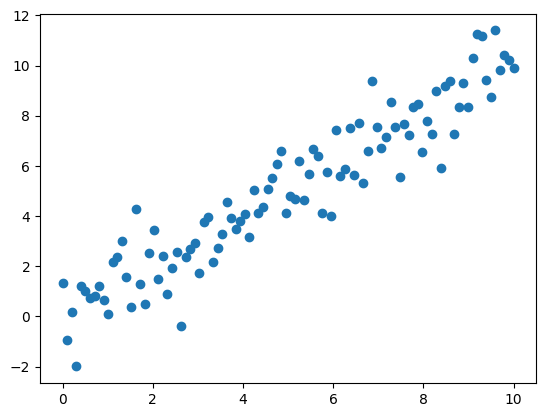

In [32]:
m=100
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

plt.scatter(X,y)

##machine learning

In [45]:

titanic=df[['Survived','Pclass','Sex','Age']]
titanic.head()

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
3,1,1,female,35.0
6,0,1,male,54.0
10,1,3,female,4.0
11,1,1,female,58.0


In [50]:
titanic['Sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

/tmp/ipython-input-3258630213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Sex'].replace(['male','female'],[0,1],inplace=True)
/tmp/ipython-input-3258630213.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Sex'].replace(['male','female'],[0,1],inplace=True)
/tmp/ipython-i

,Survived,Pclass,Sex,Age
1,1,1,1,38.0
3,1,1,1,35.0
6,0,1,0,54.0
10,1,3,1,4.0
11,1,1,1,58.0


In [51]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [52]:
y= titanic['Survived']
X=titanic.drop('Survived',axis=1)

In [53]:
model.fit(X,y)
model.score(X,y)

0.7868852459016393

78% du temps notre modele reussi a predit si un passager a survecu ou non

In [55]:
model.predict(X)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1])

verifions maintenant si j'allais survivre au naufrage grace a une fonction survie a partir duquel on va appliqué le modele

In [58]:
def survie(model,pclass,sex,age) :
  X=np.array([pclass,sex,age]).reshape(1,3)

  print(model.predict(X))

In [61]:
survie(model,2,0,20)

[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


donc voila je n'allais pas survivre au naufrage